In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 

In [2]:
df=pd.read_csv('car_price.csv')

In [ ]:
#Assumption of Linear Regression
#Target variable and  features are independent
#No auto correlation
#No multicollinearity
#Variance must be constant-Homoscedacity
#Variable X and Y have linear relationship
#Data are normally distributed

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
df.shape

(301, 9)

In [122]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [4]:
#Checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


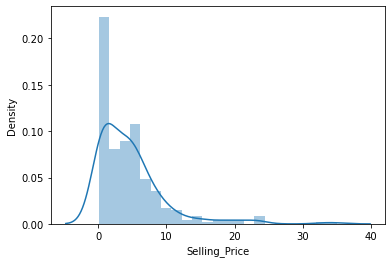

In [8]:
sns.distplot(df['Selling_Price'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


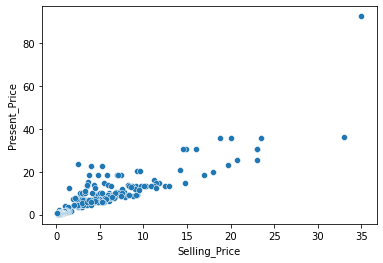

In [9]:
sns.scatterplot(df['Selling_Price'],df['Present_Price'])
plt.show()

In [3]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
#df = df[~((df_scaled < (Q1-6*IQR)) | (df > (Q3 + 6*IQR))).any(axis = 1)]
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_cat=df.select_dtypes(include='object')

In [5]:
df_num=df.drop(columns=df_cat.columns)

In [26]:
df_num.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,282.000000,282.000000,282.000000,282.000000,282.0
mean,2013.769504,4.420709,7.048014,33711.308511,0.0
std,2.792987,4.245155,6.319520,23978.713165,0.0
min,2003.000000,0.100000,0.320000,500.000000,0.0
25%,2012.000000,0.962500,1.417500,15000.000000,0.0
50%,2015.000000,3.700000,6.250000,31427.000000,0.0
75%,2016.000000,6.000000,9.757500,46654.500000,0.0
max,2018.000000,23.000000,30.610000,135154.000000,0.0


C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


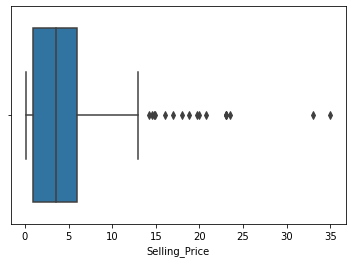

In [16]:
sns.boxplot(df['Selling_Price'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


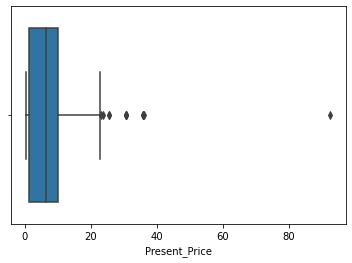

In [18]:
sns.boxplot(df['Present_Price'])
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()

In [27]:
#df_num=df_num.drop('Selling_Price',axis=1)

In [7]:
df_scaled=minmaxscaler.fit_transform(df_num)

In [8]:
df_scaled=pd.DataFrame(data=df_scaled,columns=df_num.columns)

In [9]:
df_scaled.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,0.733333,0.141921,0.173985,0.196801,0.0
1,0.666667,0.203057,0.304391,0.315624,0.0
2,0.933333,0.312227,0.314625,0.047529,0.0
3,0.533333,0.120087,0.126444,0.034904,0.0
4,0.733333,0.196507,0.216243,0.311539,0.0


In [65]:
df_scaled.describe()

,Year,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,0.708527,0.079199,0.072967,0.014396
std,0.192770,0.093673,0.077852,0.082638
min,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.009536,0.029029,0.000000
50%,0.733333,0.065886,0.063063,0.000000
75%,0.866667,0.103814,0.096631,0.000000
max,1.000000,1.000000,1.000000,1.000000


C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


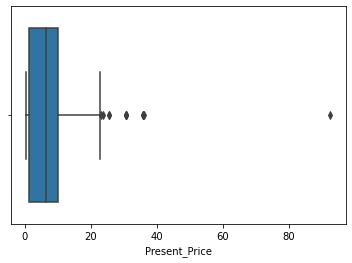

In [31]:
sns.boxplot(df['Present_Price'])
plt.show()

In [81]:
df_num.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [103]:
from sklearn.preprocessing import StandardScaler
standardscalar=StandardScaler()

In [104]:
df_standard_scalar=standardscalar.fit_transform(df_num)
df_standard_scalar=pd.DataFrame(data=df_standard_scalar,columns=df_num.columns)

In [84]:
df_standard_scalar.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,0.128897,-0.258416,-0.236215,-0.256224,-0.174501
1,-0.217514,0.017481,0.221505,0.155911,-0.174501
2,1.168129,0.510154,0.257427,-0.773969,-0.174501
3,-0.910335,-0.356950,-0.403079,-0.817758,-0.174501
4,0.128897,-0.012079,-0.087890,0.141743,-0.174501


C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


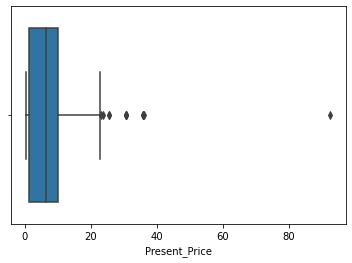

In [36]:
sns.boxplot(df['Present_Price'])
plt.show()

In [10]:
df_data.shape

NameError: name 'df_data' is not defined

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


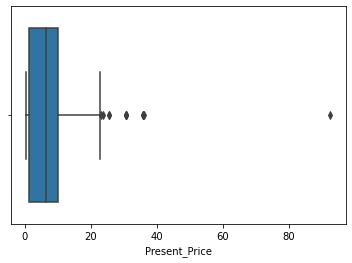

In [107]:
sns.boxplot(df['Present_Price'])
plt.show()

In [120]:
df_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [12]:
df_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [13]:
df_cat['Car_Name']=label_encoder.fit_transform(df_cat['Car_Name'])
df_cat['Fuel_Type']=label_encoder.fit_transform(df_cat['Fuel_Type'])
df_cat['Seller_Type']=label_encoder.fit_transform(df_cat['Seller_Type'])
df_cat['Transmission']=label_encoder.fit_transform(df_cat['Transmission'])

<ipython-input-13-dec03176248f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Car_Name']=label_encoder.fit_transform(df_cat['Car_Name'])
<ipython-input-13-dec03176248f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Fuel_Type']=label_encoder.fit_transform(df_cat['Fuel_Type'])
<ipython-input-13-dec03176248f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [111]:
df_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1


In [14]:
df_scaled.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Owner            0
dtype: int64

In [53]:
df_scaled.shape

(282, 5)

In [54]:
df_cat.shape

(282, 4)

In [15]:
df_final=pd.concat([df_scaled,df_cat],axis=1)

In [16]:
df_final.shape

(301, 9)

In [51]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,0.733333,0.141921,0.173985,0.196801,0.0,84.0,2.0,0.0,1.0
1,0.666667,0.203057,0.304391,0.315624,0.0,87.0,1.0,0.0,1.0
2,0.933333,0.312227,0.314625,0.047529,0.0,63.0,2.0,0.0,1.0
3,0.533333,0.120087,0.126444,0.034904,0.0,90.0,2.0,0.0,1.0
4,0.733333,0.196507,0.216243,0.311539,0.0,86.0,1.0,0.0,1.0


In [17]:
df_final.isnull().sum()

Year             19
Selling_Price    19
Present_Price    19
Kms_Driven       19
Owner            19
Car_Name         19
Fuel_Type        19
Seller_Type      19
Transmission     19
dtype: int64

In [18]:
df_final.dropna(inplace=True)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
x=df_final.drop('Selling_Price',axis=1)
y=df_final['Selling_Price']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)

In [22]:
linreg=LinearRegression()

In [23]:
linreg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=linreg.predict(x_test)

In [25]:
metrics.r2_score(y_pred,y_test)

0.8426775700018279

In [26]:
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

0.07638467881075148

In [27]:
metrics.rand_score(y_pred,y_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9915611814345991

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,linreg.predict(x_test),color='blue')
plt.title('Salary vs Experience (Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()